### function

In [3]:
import numpy as np
import pickle
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.optimizers import RMSprop
# from metrics import f1_m
# from models_og import create_classifier
# from models import create_classifier
from imblearn.over_sampling import RandomOverSampler

try:
    from tensorflow.keras import backend as K
except:
    pass

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### check model architecture

In [4]:
import numpy as np 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import datetime as dt

In [5]:
#### check model before finding saliency
from tensorflow.keras.models import load_model
from vis.utils import utils

try:
    from tensorflow.keras import backend as K
except:
    pass

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
key = 'location_v10'
leads = 0
quantiles = 0.90
models='CNN'#'MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 44, 64)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 44, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 44, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 43, 32)        8224      
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 43, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 43, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 64672)             0

In [16]:
key = 'location_v10'
m ='MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_0.90_0_100' % (key, m)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6615)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               846848    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [14]:
key = 'newm'
leads = 0
quantiles = 0.90
models='CNN'#'MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 43, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 43, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 21, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 21, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 19, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 19, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 9, 16)        

### check loss

In [1]:
import h5py
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt

v11_MLP_0.90_0.nc


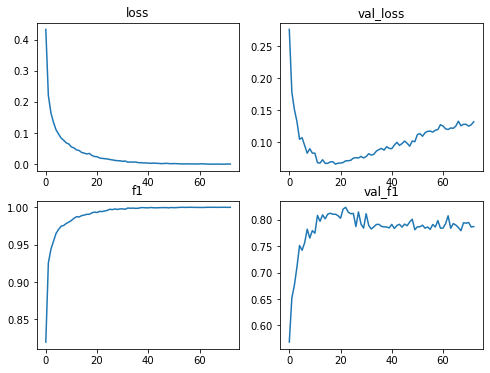

In [13]:
key='v11'
l = 0 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()

lr = 0.00005

v11_MLP_0.90_0.nc


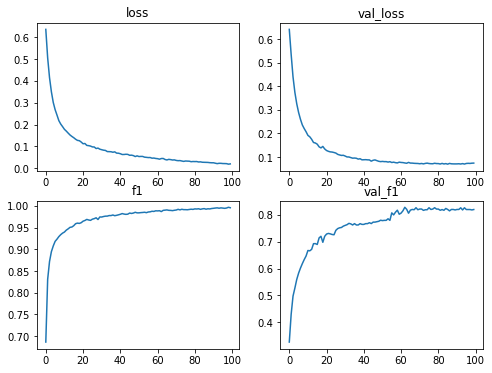

In [16]:
key='v11'
l = 0 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
    
# lr 0.00001

v11_MLP_0.90_7.nc


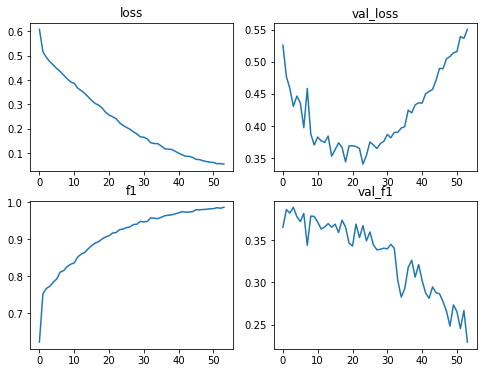

In [14]:
key='v11'
l = 7 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
    
lr = 0.00005

v11_MLP_0.90_7.nc


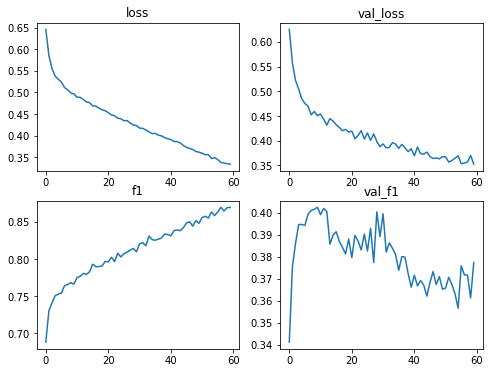

In [15]:
key='v11'
l = 7 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
    
#lr = 0.00001
# Epoch 00118: val_f1_m did not improve from 0.40206
# Epoch 00108: val_f1_m did not improve from 0.40218 drop out 0.1
# Epoch 00105: val_f1_m did not improve from 0.41519 dropout 0.2
# Epoch 00106: val_f1_m did not improve from 0.42775 dropout 0.4
# Epoch 00200: val_f1_m did not improve from 0.37856 dropout 0.5

# increase batch size to 128 from 64 
# Epoch 00181: val_f1_m did not improve from 0.41229

v11_MLP_0.90_7.nc


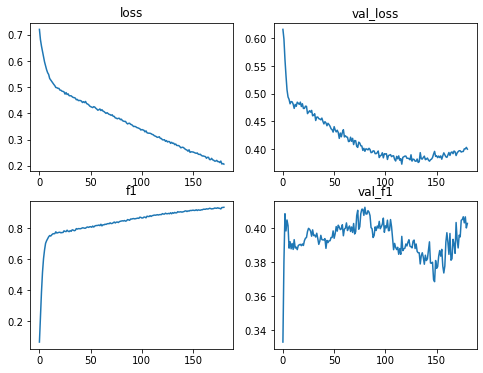

In [26]:
key='v11'
l = 7 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()

v11_MLP_0.90_7.nc


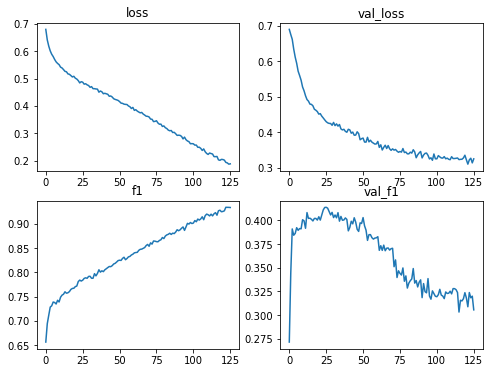

In [7]:
key='v11'
l = 7 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
# lr = 0.00001

# Epoch 00113: val_f1_m did not improve from 0.40264 回到了64 有运气的缘故

v11_MLP_0.90_7.nc


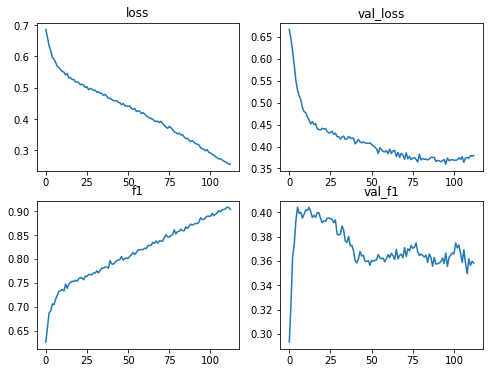

In [28]:
key='v11'
l = 7 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
# 增加了model的大小

v11_MLP_0.90_7.nc


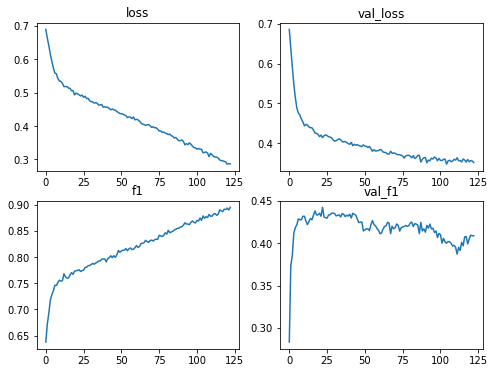

In [8]:
key='v11'
l = 7 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
m ='MLP'#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
# 恢复了model的大小，增加了前面的droppout 0.6 0.4 0.2
# Epoch 00117: val_f1_m did not improve from 0.39410

v11_MLP_0.90_7.nc


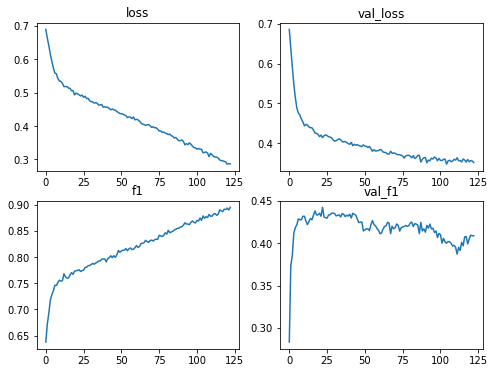

In [55]:
key='v11'
l = 7 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
m ='MLP'#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()

v11_MLP_0.90_13.nc


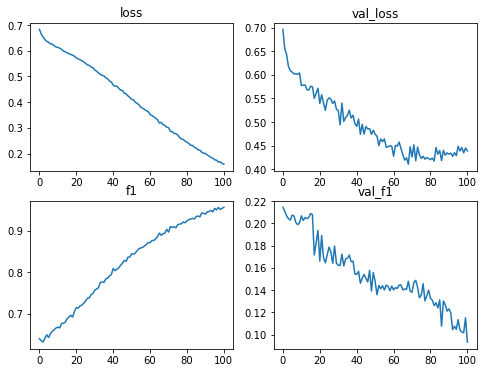

In [24]:
key='v11'
l = 13 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()


# lr = 0.00001
# increased patience from 50 to 100
# increased epoch to 200
# Epoch 00101: val_f1_m did not improve from 0.21452

v11_MLP_0.90_13.nc


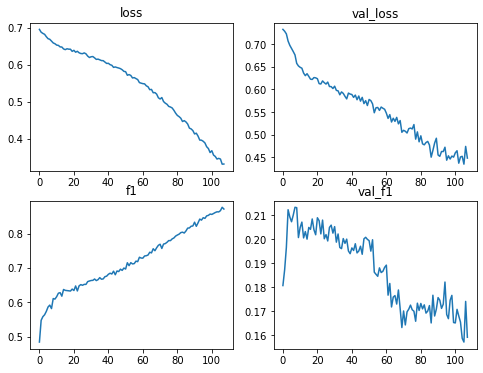

In [29]:
key='v11'
l = 13 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()


# lr = 0.00001
# increased patience from 50 to 100
# increased epoch to 200
# Epoch 00101: val_f1_m did not improve from 0.21452

# 64+big model
# Epoch 00108: val_f1_m did not improve from 0.21331

# 64+big model + bigger dropout early on
# Epoch 00145: val_f1_m did not improve from 0.22242

v11_MLP_0.90_13.nc


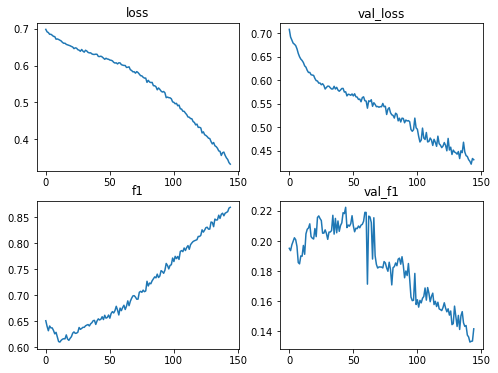

In [30]:
# Epoch 00145: 64+big model + bigger dropout early on - overfit 来的又晚了一些 
# Epoch 00145: val_f1_m did not improve from 0.22242

v11_MLP_0.90_13.nc


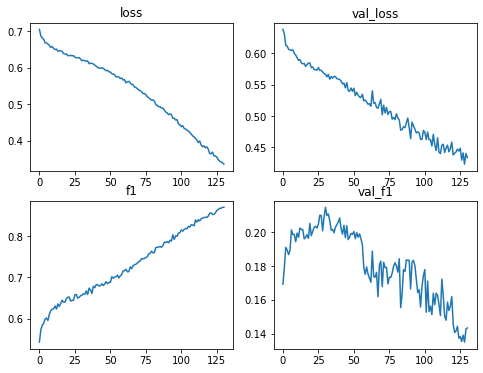

In [31]:
key='v11'
l = 13 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()

# 小model,同款dropout 0.6 0.4 0.2
# Epoch 00131: val_f1_m did not improve from 0.21466

v11_MLP_0.90_5.nc


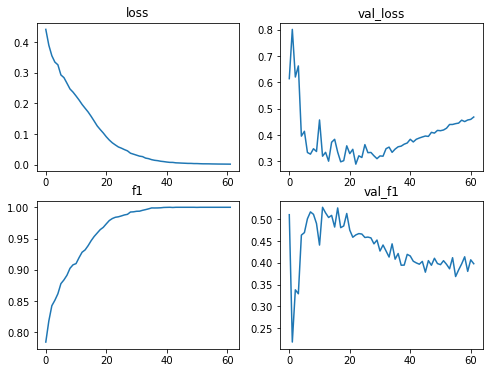

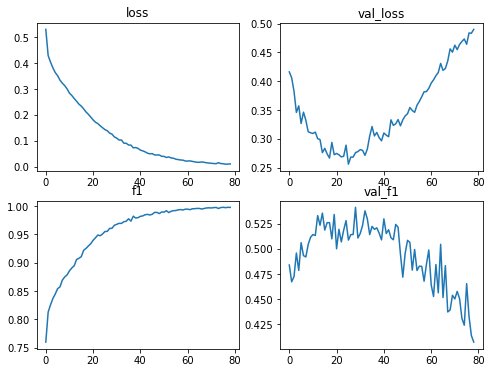

In [10]:
key='v11'
leads = [5] #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()

In [62]:
l = 5
q = 0.90
m='MLP'

outfile = 'results/tuning/gefs_mos_%s_%0.2f_%d_250' % (m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

# 最终的model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 2205)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               564736    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 8)                

In [63]:
key = 'newm'
l = 0
q = 0.90
m='MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2205)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                70592     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                

v11_MLP_0.90_0.nc


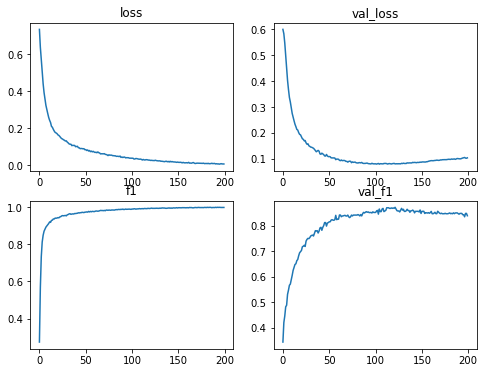

In [59]:
key='v11'
l = 0 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
# Epoch 00200: val_f1_m did not improve from 0.87282

v11_MLP_0.90_5.nc


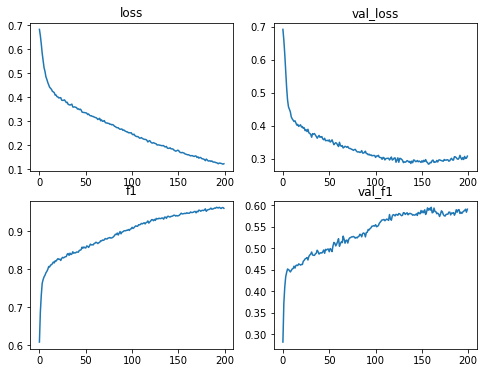

In [60]:
key='v11'
l = 5 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()
# Epoch 00200: val_f1_m did not improve from 0.59577
# 看起来似乎还有潜力 下面加了epoch看一下

v11_MLP_0.90_5.nc


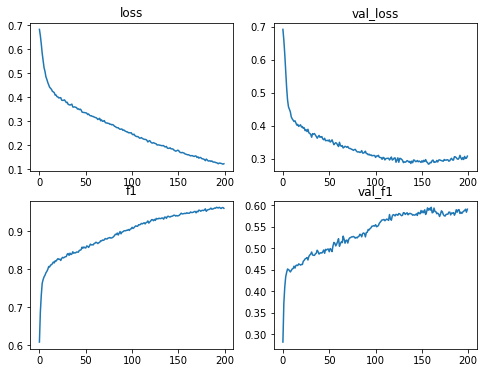

In [61]:
key='v11'
l = 5 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()

#Epoch 00250: val_f1_m did not improve from 0.62340
#250个epoch

# 又试了几个失败的 300 epoch (都没能过0.60)
# Epoch 00253: val_f1_m did not improve from 0.59717

# 这与运气有很大的关系 initialization
# 第三次 Epoch 00281: val_f1_m did not improve from 0.61481
# 难道0.62是走了狗屎运？GEFS是很好的朋友们，有快要0.7

location_v10_CNN_0.90_5.nc


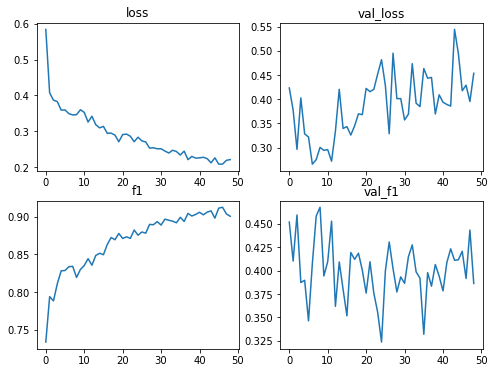

location_v9_CNN_0.90_5.nc


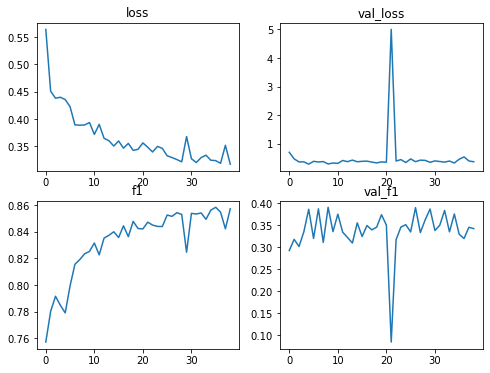

location_nonstd3_CNN_0.90_5.nc
no file.
location_CNN_0.90_5.nc
no file.
newm_CNN_0.90_5.nc


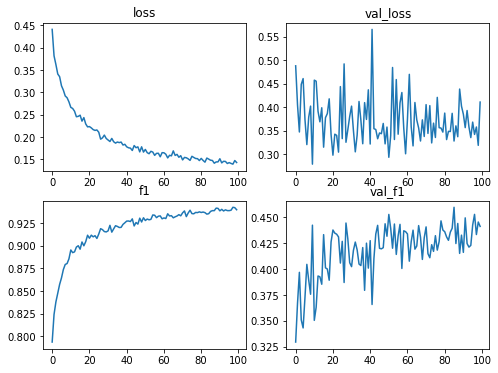

_CNN_0.90_5.nc
no file.


In [3]:
keys = ['location_v10','location_v9','location_nonstd3', 'location','newm', '']
leads = [5] #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
m ='CNN'#,'MLP']
for l in leads:
    for key in keys:
        print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
        try:
            history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
        except:
            print('no file.')
            continue
        plt.rcParams['figure.figsize'] = [8,6]
        fig, axs = plt.subplots(2, 2)
        axs[0, 0].plot(history[0])
        axs[0, 0].set_title("loss")
        axs[1, 0].plot(history[1])
        axs[1, 0].set_title("f1")
        axs[0, 1].plot(history[2])
        axs[0, 1].set_title("val_loss")
        axs[1, 1].plot(history[3])
        axs[1, 1].set_title("val_f1")
        plt.show()

location_v10_CNN_0.90_0.nc


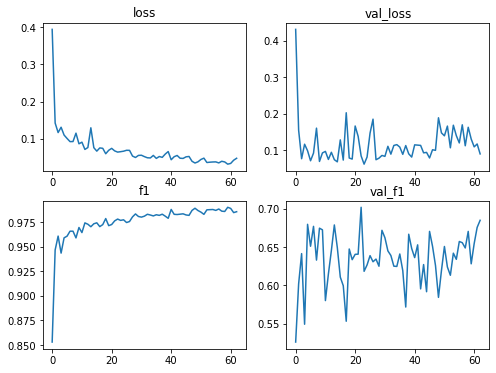

location_v10_CNN_0.90_5.nc


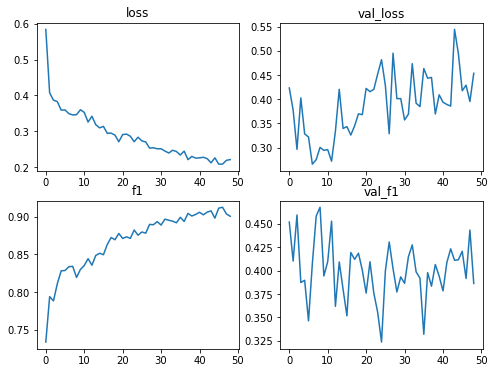

location_v10_CNN_0.90_6.nc


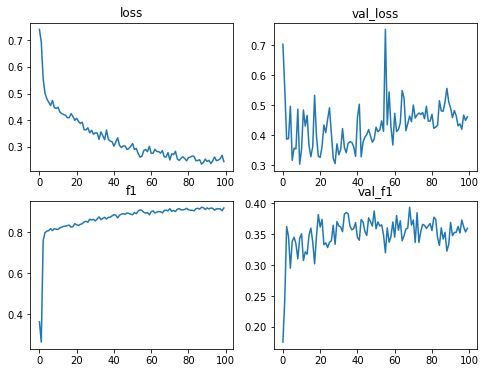

location_v10_CNN_0.90_7.nc


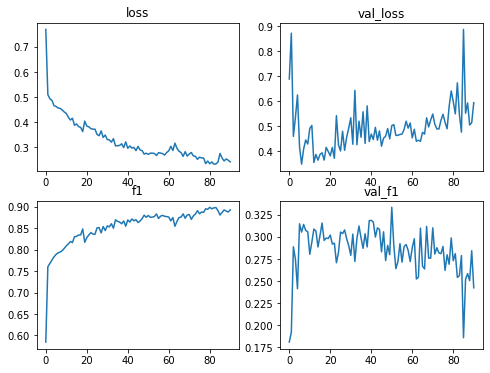

location_v10_CNN_0.90_8.nc


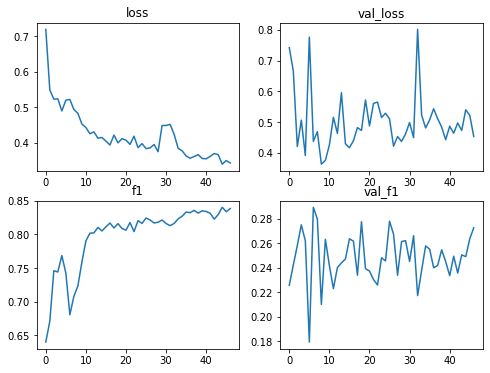

location_v10_CNN_0.90_10.nc


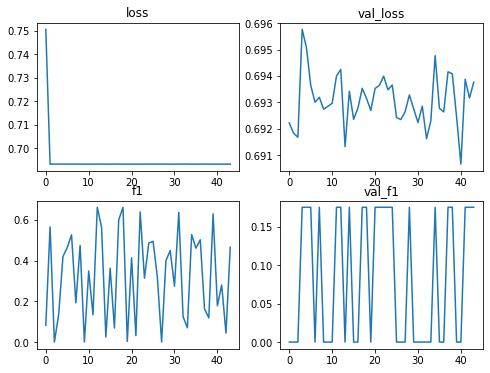

location_v10_CNN_0.90_11.nc


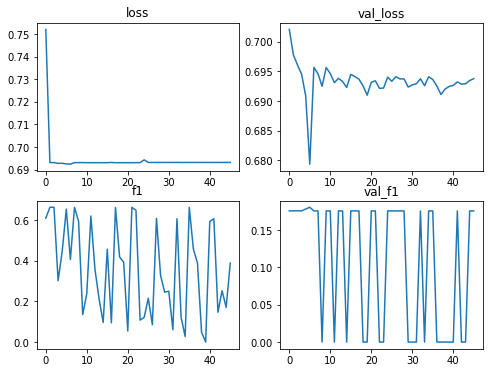

location_v10_CNN_0.90_12.nc


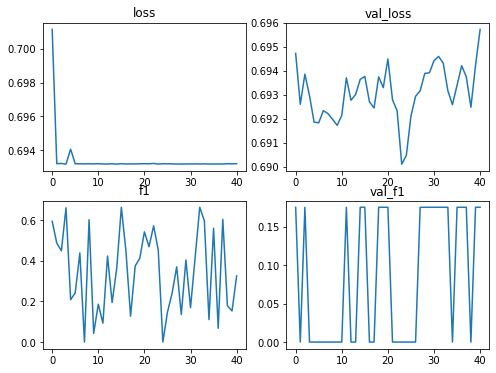

In [9]:
key = 'location_v10'
leads = [0,5, 6,7,8,10,11,12]#[d for d in range(14)]
quantiles = [0.90] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['CNN']#,'MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()

location_v10_MLP_0.90_0.nc


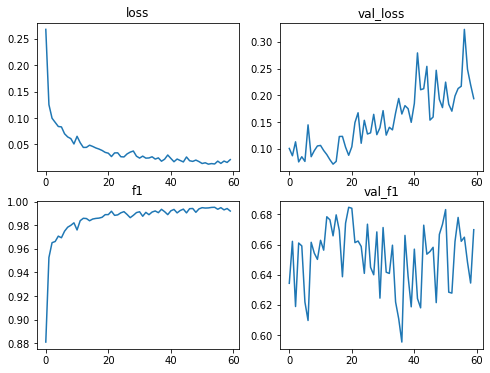

location_v10_MLP_0.90_5.nc


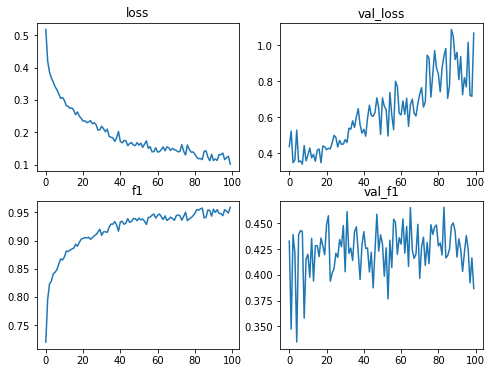

location_v10_MLP_0.90_10.nc


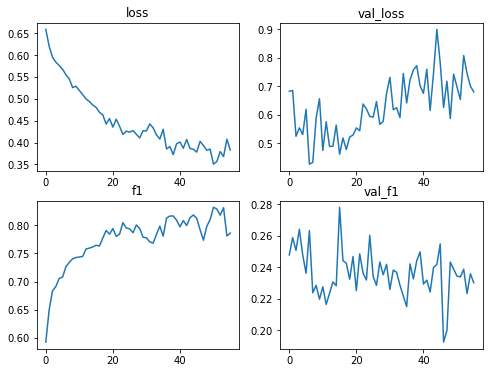

In [8]:
key = 'location_v10'
leads = [0,5,10]#[d for d in range(14)]
quantiles = [0.90] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['MLP']#,'MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()

location_v9_CNN_0.75_0.nc


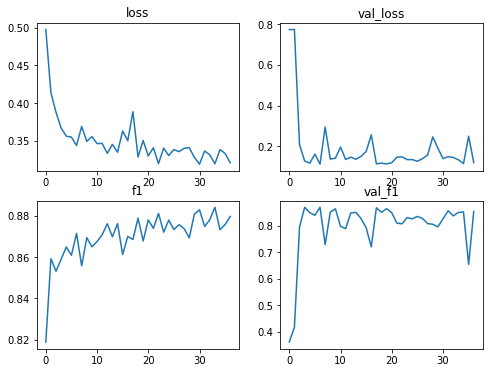

location_v9_CNN_0.75_5.nc


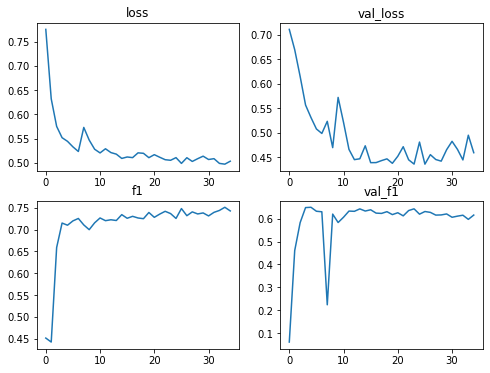

location_v9_CNN_0.75_10.nc


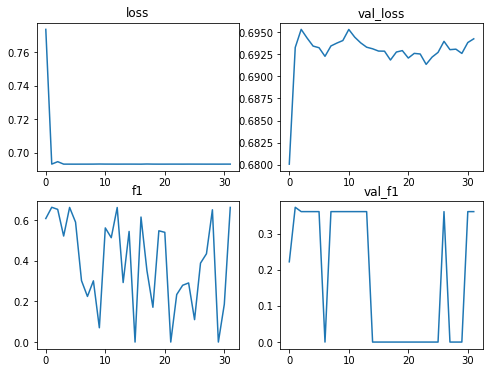

location_v9_CNN_0.90_0.nc


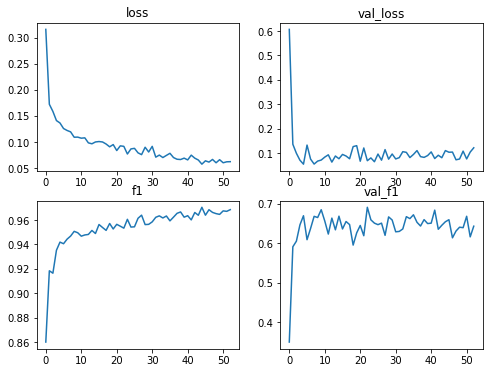

location_v9_CNN_0.90_5.nc


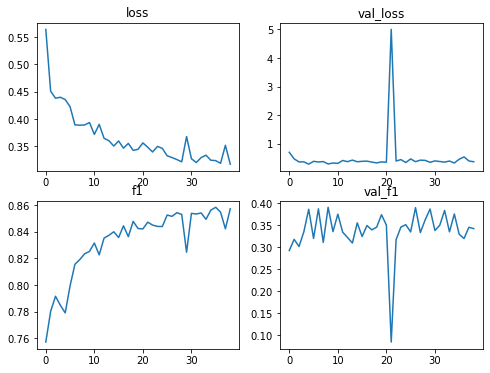

location_v9_CNN_0.90_10.nc


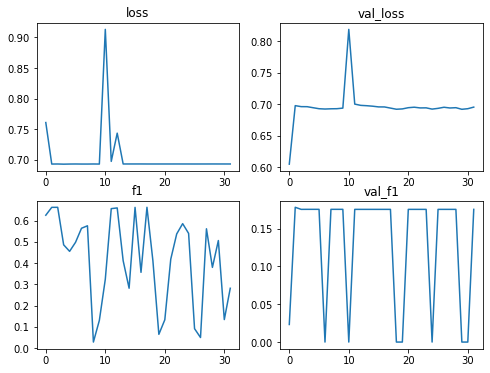

location_v9_CNN_0.95_0.nc
Not able to retrieve
location_v9_CNN_0.95_5.nc


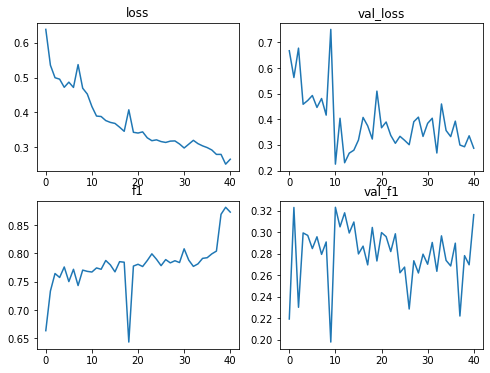

location_v9_CNN_0.95_10.nc


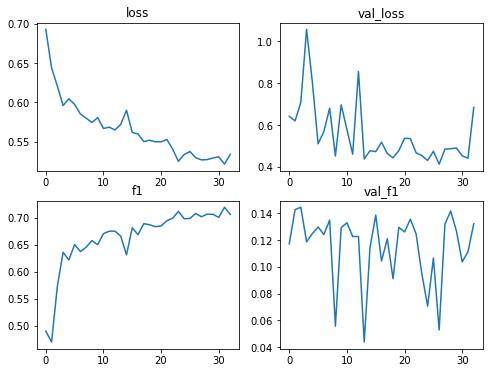

location_v9_MLP_0.75_0.nc


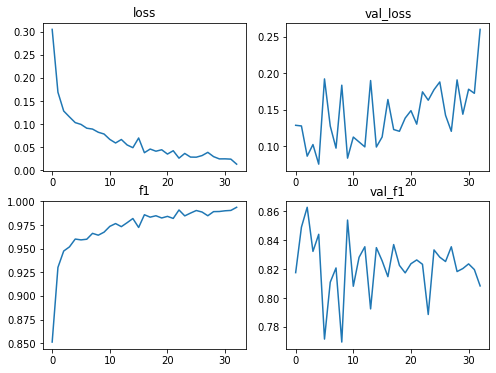

location_v9_MLP_0.75_5.nc


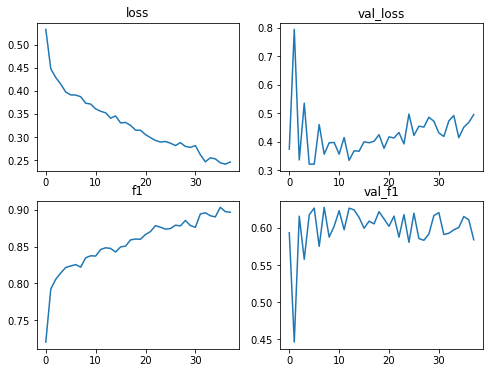

location_v9_MLP_0.75_10.nc


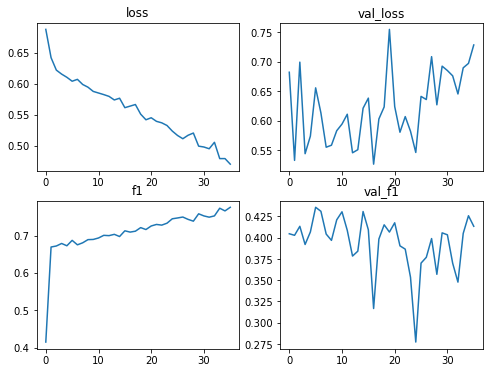

location_v9_MLP_0.90_0.nc


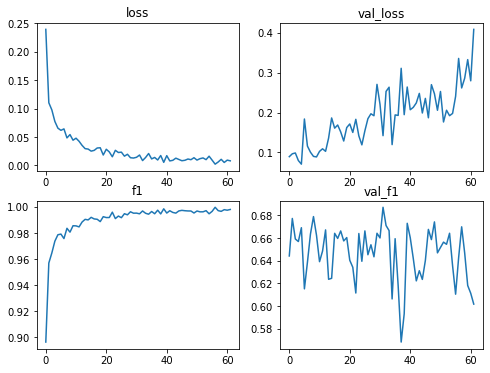

location_v9_MLP_0.90_5.nc


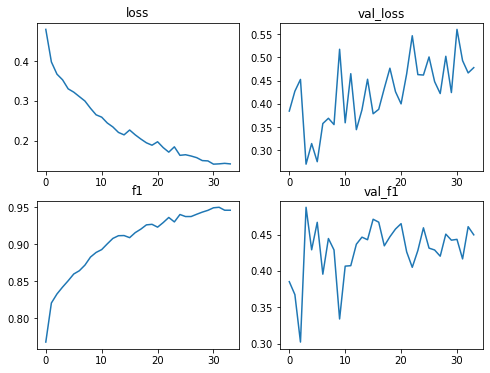

location_v9_MLP_0.90_10.nc


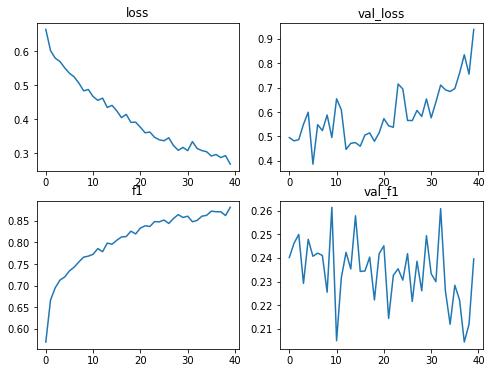

location_v9_MLP_0.95_0.nc


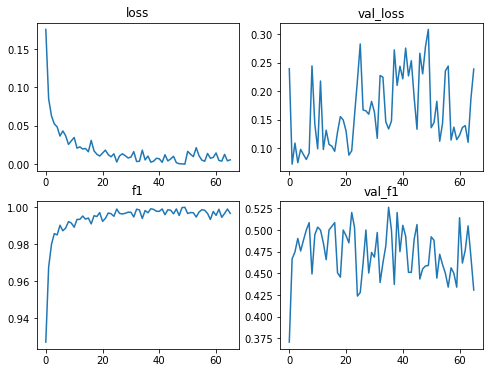

location_v9_MLP_0.95_5.nc


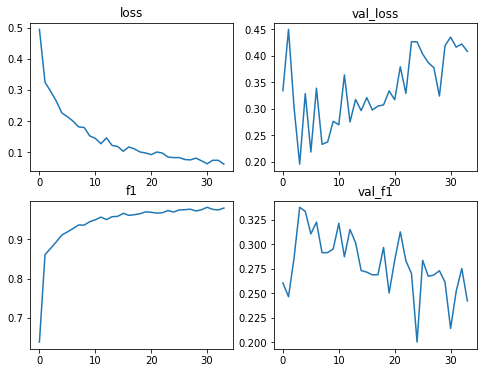

location_v9_MLP_0.95_10.nc


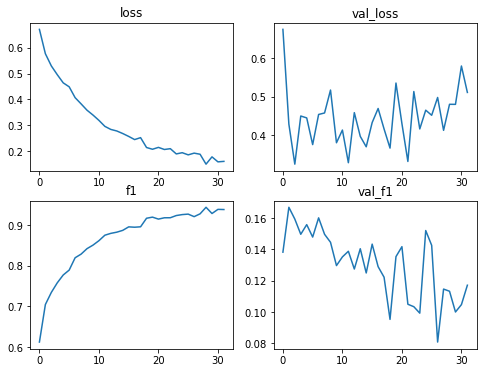

In [7]:
key = 'location_v9'
leads = [0,5,10]#[d for d in range(14)]
quantiles = [0.75, 0.90, 0.95] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['CNN','MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            try:
                history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            except:
                print('Not able to retrieve')
                continue
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()

In [46]:
import numpy as np 
import pandas as pd
import pickle
from tensorflow.keras.models import load_model

def is_NDJFM(month):
  return (month >= 11) | (month <= 3)

path = 'data/'
gefs_wcus ='tensor/gefs_mos_daily_tensor_precip_center.pkl'
x_train, y_train, x_test, y_test = pickle.load(open(path+gefs_wcus, 'rb'))
X = np.concatenate((x_train, x_test))
pr_true = np.concatenate((y_train, y_test))

epochs = 200
models = ['MLP'] #['CNN', 'MLP']#, 'MLP', 'VGG16', 'ConvLSTM']
leads = [7] #[d for d in range(14)]
quantiles = [0.90] #[0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
# threshold = 0.5 # by default, but should be higher to reduce FP

# whole period. test period starts 2011.
results = pd.DataFrame(index=pd.date_range('1985-01-01','2019-12-31'))
results = results[is_NDJFM(results.index.month)]
results['ERA5'] = pr_true

# create location dimension for CNN

if models[0] =='CNN':
    # create lat coord
    lat_coord = np.linspace(14,62,49)-38
    lat_coord[29:] = lat_coord[29:]-4
    lat_coord[:24] = np.round(lat_coord[:24]/max(abs(lat_coord)),2)
    lat_coord[29:] = np.round(lat_coord[29:]/max(abs(lat_coord)),2)
    lat_coord[24:29] = 0

    # create lon coord
    # 97 - 141
    # 263 - 219
    # 240 - 237
    lon_coord = np.linspace(219,263,45)-237
    lon_coord[22:]=lon_coord[22:]-3
    lon_coord[:18] = np.round(lon_coord[:18]/max(abs(lon_coord)),2)
    lon_coord[22:] = np.round(lon_coord[22:]/max(abs(lon_coord)),2)
    lon_coord[18:22] = 0
    lon_coord = -lon_coord

    # end result should be a rectangle matrix of the size 49*45
    lat_coord = np.repeat(lat_coord,45).reshape(49,45)
    lon_coord = np.transpose(np.repeat(lon_coord,49).reshape(45,49))

    # match size of input to cnn (3932,49,45,3)
    lat_stacked = np.stack([lat_coord for _ in range(x_train.shape[0])],axis=0)
    lon_stacked = np.stack([lon_coord for _ in range(x_train.shape[0])],axis=0)
    x_train = np.stack((np.squeeze(x_train), lat_stacked, lon_stacked), axis=3)
    lat_stacked = lat_stacked[0:x_test.shape[0],:,:]
    lon_stacked = lon_stacked[0:x_test.shape[0],:,:]
    x_test = np.stack((np.squeeze(x_test), lat_stacked, lon_stacked), axis=3)


for quantile in quantiles:
    q = np.quantile(pr_true, quantile)
    era5_q =  (pr_true > q)
    results['ERA5_%0.2f' % quantile] = era5_q

    for l in leads:
    
        for m in models:
            if m == "CNN":
                input_X = np.stack((np.squeeze(X[:,:,:,:,l]), lat_stacked,lon_stacked), axis=3)
            else:
                input_X = X[:,:,:,:,l]

            col = '%s_%d_%0.2f' % (m, l, quantile)
            print(col)
            outfile = 'results/tuning/gefs_mos_%s_%0.2f_%d_%d' % (m, quantile, l, epochs)

            model = load_model(outfile+'_bestmodel.h5',
                               custom_objects={'f1_m': f1_m})

            # get input features from gefs west coast, and run prediction
            y_pred = model.predict(input_X)

            # class probability 0-1 of event > threshold
results[col] = y_pred # (y_pred > threshold) 

results

MLP_7_0.90


,ERA5,ERA5_0.90,MLP_7_0.90
1985-01-01,0.000184,False,0.032015
1985-01-02,0.000434,False,0.036963
1985-01-03,0.000059,False,0.045721
1985-01-04,0.000123,False,0.077676
1985-01-05,0.000900,False,0.111066
...,...,...,...
2019-12-27,0.000504,False,0.273236
2019-12-28,0.000050,False,0.196166
2019-12-29,0.187076,False,0.141394
2019-12-30,0.288100,False,0.066083


In [47]:
from sklearn.metrics import f1_score

f1_cal = {}
f1_cal[q] = {}
f1model = []
f1modelerr = []
no_skill = []

y_pred = y_pred[3932:] # test only
era5_q = era5_q[3932:]

no_skill.append(era5_q.sum() / era5_q.size)

# bootstrap
nboot = 100
temp = np.zeros(nboot)
N = era5_q.size

for i in range(nboot):
    r = np.random.randint(N, size=N)
    temp[i] = f1_score(era5_q[r], (y_pred[r] > 0.5))

f1model.append(np.mean(temp))
f1modelerr.append(1.96 * np.std(temp, ddof=1)) 
f1_cal[q][m] = (f1model, f1modelerr)


In [53]:
f1_cal

{1.3849092245101928: {'MLP': ([0.46826920714774967], [0.04797970633031479])}}

(0.0, 1.0)

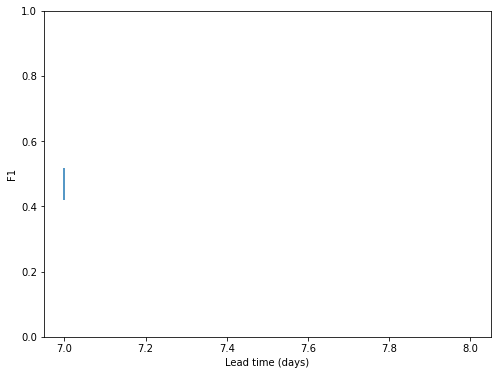

In [54]:
plt.errorbar(x = 7,y = f1model, yerr = f1modelerr)
plt.plot(np.array(leads)+1, np.array(no_skill), '--', color='0.5')
plt.xlabel('Lead time (days)')
plt.ylabel('F1')
plt.ylim([0,1])

#比之前好一点点...